Карпеченко Д.М., dz26, v.0.2, 19.02.2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter
import os
import cv2
import random
import tensorflow as tf

from tensorflow import keras
from keras.utils import to_categorical


In [2]:
#test=[r'https://tfhub.dev/google/bit/s-r50x1/1']

In [3]:
#model = tf.keras.Sequential([hub.KerasLayer(test[0], trainable=False)])

In [4]:
#model.build([None, 50,50,3])

Получим список всех файлов в папках с изображениями

In [5]:
for dirname, _,filenames in os.walk(r'D:\TeachMeSkills\DZ\dz26\notMNIST_small'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MDEtMDEtMDAudHRm.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MDRiXzA4LnR0Zg==.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MlJlYmVsc0RldXgtQmxhY2sub3Rm.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MlRvb24gU2hhZG93LnR0Zg==.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MlRvb24yIFNoYWRvdy50dGY=.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MTFTMDEgQmxhY2sgVHVlc2RheSBPZmZzZXQudHRm.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MTggSG9sZXMgQlJLLnR0Zg==.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MTh0aENlbnR1cnkudHRm.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MTIgV2FsYmF1bSBJdGFsaWMgMTMyNjMudHRm.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\MTJTYXJ1WWVsbG93Rm9nLnR0Zg==.png
D:\TeachMeSkills\DZ\dz26\notMNIST_small\A\Nng3b2N0IEFsdGVybmF0ZSBFeHRyYUxpZ2h0LnR0Zg==.png
D:\TeachMeSki

In [6]:
labels = os.listdir(r'D:\TeachMeSkills\DZ\dz26\notMNIST_small')

In [7]:
data_dir=r'D:\TeachMeSkills\DZ\dz26\notMNIST_small'

Загружаем наши изображения и получаем для каждого векторное представление. В переменной data верторное представление изображения + y - классы

In [8]:
img_size = 50
data = [] 
y = []
for label in labels: 
    path = os.path.join(data_dir, label)
    
    for img in os.listdir(path):
        try:
            img_arr = Image.open(os.path.join(path, img))
            #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(np.asarray(img_arr, dtype = np.float32))
            y.append(label)
        except Exception as e:
            print(e)
data = np.asarray(data)
y = np.asarray(y)

In [9]:
data.shape

(18724, 28, 28)

In [10]:
y.shape

(18724,)

In [11]:
y

array(['A', 'A', 'A', ..., 'J', 'J', 'J'], dtype='<U1')

In [12]:
y = to_categorical(list(map(lambda x: ord(x)-ord('A'), y)), num_classes=10)

In [13]:
y.shape

(18724, 10)

In [14]:
indexes = np.arange(data.shape[0])
np.random.seed(18)
np.random.shuffle(indexes)
data, y = data[indexes], y[indexes]

In [15]:
indexes

array([ 7835,  4194, 14664, ..., 16305,  1726,  2885])

In [16]:
data=data/255.0

In [17]:
data

array([[[0.        , 0.        , 0.        , ..., 0.99607843,
         1.        , 0.8745098 ],
        [0.        , 0.        , 0.        , ..., 0.99215686,
         1.        , 0.6156863 ],
        [0.        , 0.        , 0.        , ..., 0.9882353 ,
         1.        , 0.3137255 ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.16078432, 0.24313726, 0.2509804 , ..., 0.        ,
         0.        , 0.        ],
        [0.87058824, 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.07450981, 0.19607843],
        [0.        , 0.        , 0.        , ..., 0.2627451 ,
         0.8745098 , 0.84313726],
        [0.        , 0.        , 0.        , ..., 0.95686275,
         1.        , 0.627451  ],
        ...,
        [0.        , 0.00784314, 0.        , ..., 0.00392157,
         0.        , 0.        ],
        [0. 

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
X_train, X_test = data[:13000], data[13000:]
y_train, y_test = y[:13000], y[13000:]

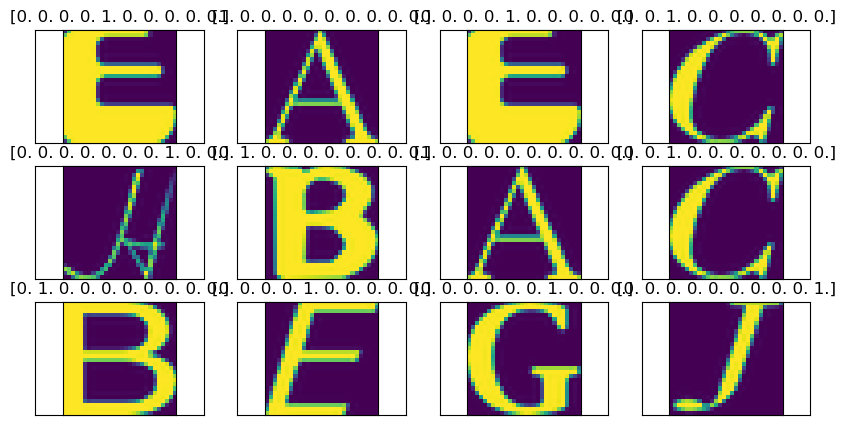

In [20]:
img_shape=data[0].shape
fig, axes = plt.subplots(3, 4, figsize=(10, 5),
                            subplot_kw={'xticks':(), 'yticks': ()})

for i in range(12):
    l=random.randint(0,len(data[0]))
    ax = fig.add_subplot(3, 4, i+1 , xticks=[], yticks=[])
    ax.imshow(data[l])
    ax.set_title(f'{y_train[l]}')

In [21]:
model = keras.models.Sequential([
   
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,padding='SAME',
                        activation='relu', input_shape=(28, 28,1)),
    
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128, kernel_size=3),
    
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    
      
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='elu'),
 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='elu'),
 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Nadam(learning_rate=0.0003), 
              metrics=['categorical_accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_categorical_accuracy',
        min_delta=1e-3,
        patience=5,
        verbose=1)
]

#with tf.device('/cpu:0'):
with tf.device('/gpu:0'):
    history = model.fit(X_train, y_train, batch_size=256, epochs=50,
                        callbacks=callbacks, 
                        validation_split=0.2, 
                        verbose=1)

Epoch 1/50
41/41 [==============================] - 7s 105ms/step - loss: 2.1109 - categorical_accuracy: 0.2324 - val_loss: 1.2813 - val_categorical_accuracy: 0.6800
Epoch 2/50
41/41 [==============================] - 4s 99ms/step - loss: 1.2032 - categorical_accuracy: 0.5922 - val_loss: 0.5899 - val_categorical_accuracy: 0.8585
Epoch 3/50
41/41 [==============================] - 4s 102ms/step - loss: 0.7385 - categorical_accuracy: 0.7724 - val_loss: 0.4137 - val_categorical_accuracy: 0.8827
Epoch 4/50
41/41 [==============================] - 4s 98ms/step - loss: 0.5481 - categorical_accuracy: 0.8338 - val_loss: 0.3686 - val_categorical_accuracy: 0.8915
Epoch 5/50
41/41 [==============================] - 4s 97ms/step - loss: 0.4646 - categorical_accuracy: 0.8659 - val_loss: 0.3271 - val_categorical_accuracy: 0.9023
Epoch 6/50
41/41 [==============================] - 4s 101ms/step - loss: 0.4188 - categorical_accuracy: 0.8776 - val_loss: 0.3062 - val_categorical_accuracy: 0.9085
Epoch 7

In [22]:
print('Model summary:')
print(model.summary())

Model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dropout (Dropout)           (None, 4608)

In [23]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Точность на тестовых данных: %.4f" % scores[1])

Точность на тестовых данных: 0.9450
